In [7]:
import pandas as pd

# Load the first CSV file to understand its structure
tweets_df = pd.read_csv('./stock_tweets.csv')

# Load the second CSV file to understand its structure
finance_df = pd.read_csv('./stock_yfinance_data.csv')

In [13]:
finance_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Stock Name', 'Price Change'],
      dtype='object')

In [8]:
from collections import Counter
import matplotlib.pyplot as plt

In [9]:
# Calculate the length of each tweet (in terms of characters)
tweet_lengths = tweets_df['Tweet'].str.len()


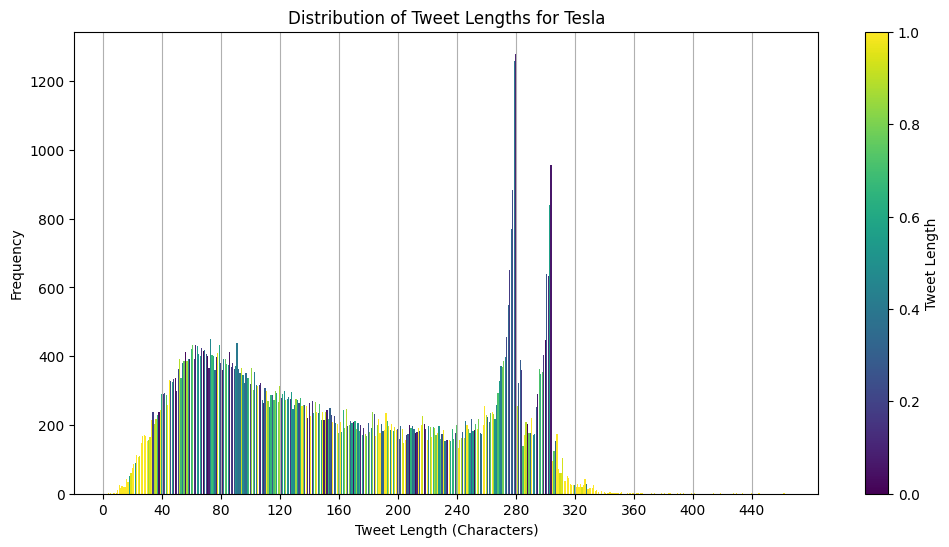

In [10]:
# Count the number of occurrences of each tweet length (without any restriction this time)
tweet_length_counts = Counter(tweet_lengths)

# Prepare data for plotting
tweet_lengths = list(tweet_length_counts.keys())
tweet_counts = list(tweet_length_counts.values())
tweet_colors = plt.cm.viridis(range(len(tweet_lengths)))

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(tweet_lengths, tweet_counts, color=tweet_colors)
plt.title('Distribution of Tweet Lengths for Tesla')
plt.xlabel('Tweet Length (Characters)')
plt.ylabel('Frequency')
plt.xticks(range(0, max(tweet_lengths) + 1, 40))  # Setting x-axis ticks to show every 40 characters
plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), label='Tweet Length')
plt.grid(axis='x')  # Adding a grid for x-axis for better readability
plt.show()

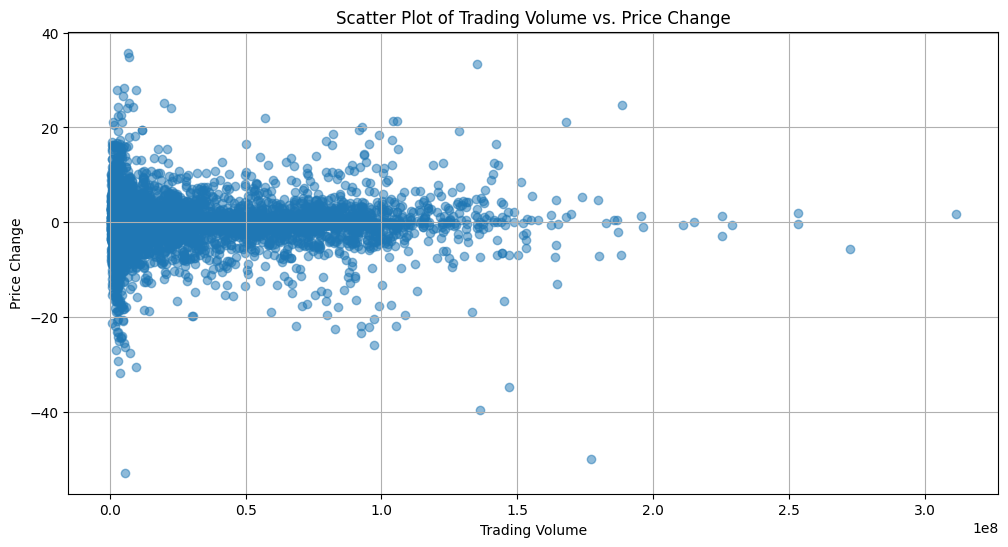

-0.00945478177817313

In [11]:
# Calculate daily price changes
finance_df['Price Change'] = finance_df['Close'] - finance_df['Open']

# Plot a scatter plot of Volume vs. Price Change
plt.figure(figsize=(12, 6))
plt.scatter(finance_df['Volume'], finance_df['Price Change'], alpha=0.5)
plt.title('Scatter Plot of Trading Volume vs. Price Change')
plt.xlabel('Trading Volume')
plt.ylabel('Price Change')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient between Volume and Price Change
correlation = finance_df['Volume'].corr(finance_df['Price Change'])
correlation

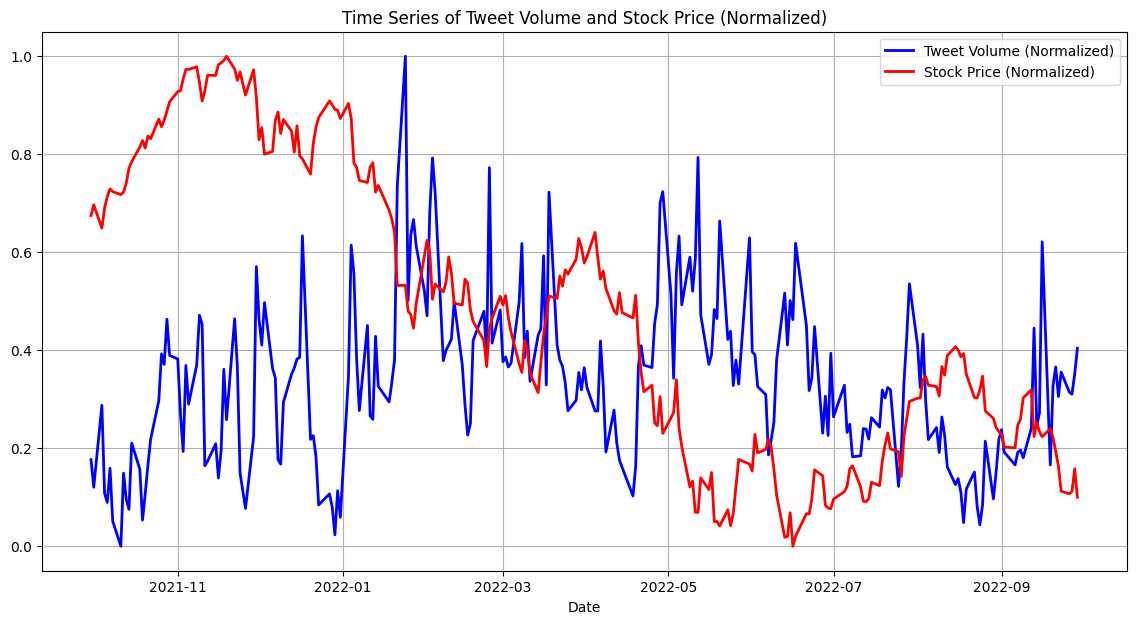

In [18]:
# Convert the 'Date' column of finance_df to datetime for proper merging
finance_df['Date'] = pd.to_datetime(finance_df['Date']).dt.date

# Aggregate stock price data by date using the closing price
stock_price_by_date = finance_df.groupby('Date')['Close'].mean()
tweet_volume_by_date = finance_df.groupby('Date')['Volume'].mean()
# Normalize both the tweet volume and stock price data to fit on the same plot
# We will use min-max scaling for normalization
tweet_volume_normalized = (tweet_volume_by_date - tweet_volume_by_date.min()) / (tweet_volume_by_date.max() - tweet_volume_by_date.min())
stock_price_normalized = (stock_price_by_date - stock_price_by_date.min()) / (stock_price_by_date.max() - stock_price_by_date.min())

# Combine both series into a single DataFrame for plotting
combined_df = pd.concat([tweet_volume_normalized, stock_price_normalized], axis=1)
combined_df.columns = ['Tweet Volume', 'Stock Price']

# Plot both time series on the same chart
plt.figure(figsize=(14, 7))
combined_df['Tweet Volume'].plot(color='blue', linewidth=2, label='Tweet Volume (Normalized)')
combined_df['Stock Price'].plot(color='red', linewidth=2, label='Stock Price (Normalized)')
plt.title('Time Series of Tweet Volume and Stock Price (Normalized)')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()